In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from category_encoders import TargetEncoder

%matplotlib inline

In [107]:
titanic = pd.read_csv('/Users/sangdonlee/GitHub/iod/materials/data/titanic_train.csv')

In [108]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [109]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [110]:
encoder=TargetEncoder()

In [111]:

titanic['Embarked_Encode'] = encoder.fit_transform(titanic['Embarked'], titanic['Survived'])

In [112]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.339009
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.553571
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.339009
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.339009
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.339009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.339009
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.339009
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.339009
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.553571


In [113]:
titanic.groupby(['Embarked','Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

In [114]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.339009
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.553571
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.339009
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.339009
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.339009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.339009
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.339009
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.339009
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.553571


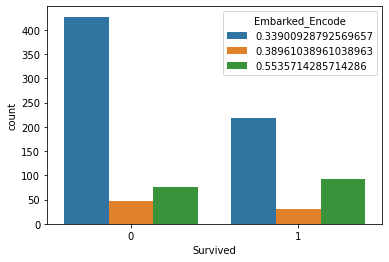

In [115]:
sns.countplot(x='Survived', hue='Embarked_Encode', data=titanic)

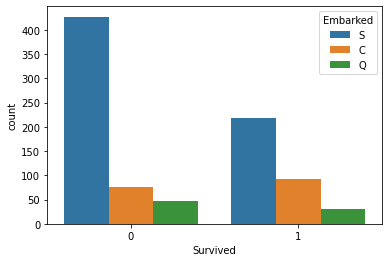

In [116]:
sns.countplot(x='Survived', hue='Embarked', data=titanic)

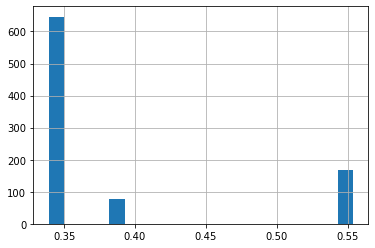

In [117]:
titanic['Embarked_Encode'].hist(bins=20)

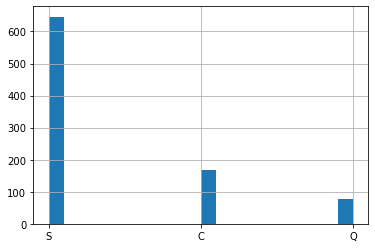

In [118]:
titanic['Embarked'].hist(bins=20)

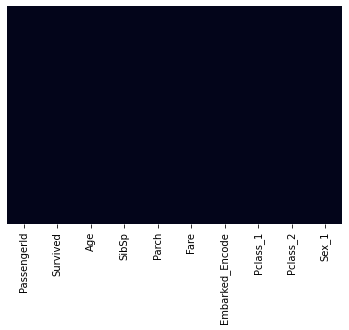

In [142]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False)

In [120]:
by_sex_class = titanic.groupby(['Sex','Pclass'])  ## create groupby object

In [121]:

def impute_median(series):
    return series.fillna(series.median())

In [122]:
titanic['Age'] = by_sex_class.Age.transform(impute_median)

In [124]:
titanic.drop(columns=['Name', 'Ticket','Cabin'], axis=1, inplace=True)

In [125]:
titanic.drop(columns=['Embarked'], axis=1, inplace=True)

In [126]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [127]:
def one_hotencode(data, col):
    onehotencoder = OneHotEncoder()
    X = onehotencoder.fit_transform(data[col].values.reshape(-1,1)).toarray()
    dfOneHot = pd.DataFrame(X, columns = [col+'_'+str(int(i)) for i in range(X.shape[1])])
    df = pd.concat([data, dfOneHot], axis=1)
    f= df.drop([col], axis=1)
    return f

In [128]:
titanic = one_hotencode(titanic, 'Pclass')

In [129]:
titanic = one_hotencode(titanic, 'Sex')

In [130]:
titanic

,PassengerId,Survived,Age,SibSp,Parch,Fare,Embarked_Encode,Pclass_0,Pclass_1,Pclass_2,Sex_0,Sex_1
0,1,0,22.0,1,0,7.2500,0.339009,0.0,0.0,1.0,0.0,1.0
1,2,1,38.0,1,0,71.2833,0.553571,1.0,0.0,0.0,1.0,0.0
2,3,1,26.0,0,0,7.9250,0.339009,0.0,0.0,1.0,1.0,0.0
3,4,1,35.0,1,0,53.1000,0.339009,1.0,0.0,0.0,1.0,0.0
4,5,0,35.0,0,0,8.0500,0.339009,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0.339009,0.0,1.0,0.0,0.0,1.0
887,888,1,19.0,0,0,30.0000,0.339009,1.0,0.0,0.0,1.0,0.0
888,889,0,21.5,1,2,23.4500,0.339009,0.0,0.0,1.0,1.0,0.0
889,890,1,26.0,0,0,30.0000,0.553571,1.0,0.0,0.0,0.0,1.0


In [131]:
titanic.drop(columns=['Sex_0', 'Pclass_0'], axis=1, inplace=True)

In [132]:
import statsmodels.api as sm

# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

In [133]:
calculate_vif(titanic)

,Var,Vif
6,Embarked_Encode,13.85
2,Age,5.72
8,Pclass_2,4.27
9,Sex_1,3.87
0,PassengerId,3.84
5,Fare,2.42
1,Survived,2.40
7,Pclass_1,1.94
4,Parch,1.61
3,SibSp,1.56


In [134]:
from sklearn.model_selection import train_test_split


In [135]:

X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived', axis=1), 
                                                    titanic['Survived'], test_size=0.30, random_state=101)

In [136]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [137]:
print(metrics.confusion_matrix(y_test, predictions))

[[136  18]
 [ 40  74]]


In [138]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [150]:
print('precision TP = ', 74 / (74+18))

precision TP =  0.8043478260869565


In [151]:
print('precision TN = ', 136 / (136+40))

precision TN =  0.7727272727272727


In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.80      0.65      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268



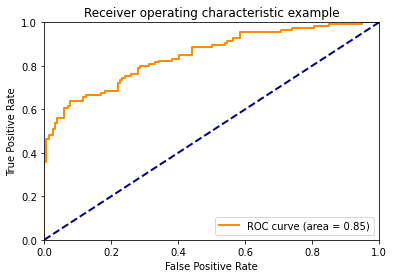

In [141]:
from sklearn import metrics

preds = logmodel.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [144]:
2*0.77*0.88 / (0.77+0.88)

0.8213333333333334